<a href="https://colab.research.google.com/github/mteoraso/Energia_electrica_COL_XM/blob/EDA/Demanda_no_atendida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydataxm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.11-py3-none-any.whl size=10731 sha256=10db07527af2f61fca288cd0c21cb4392544453b845dc72afc09dacc7423c9b5
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/6da4301bf3c954a6c22b2e7bc7d5bda39a42cd5d5ea7e0cf18
Successfully built pydataxm


In [3]:
# Importación
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

# Crear una instancia de catalogo con el tipo
catalogo_conjuntos = CatalogSIMEM('Datasets')

In [4]:
# Crear una instancia de ReadSIMEM
dataset_id = '3C77AF'
fecha_inicio = '2020-01-01'
fecha_fin = '2024-04-30'
generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)

# Recuperar datos
data = generacion.main(filter=False)
print(data)

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Eventos de Demanda No Atendida"
Start of asynchronous data extraction
End of data extracting process
****************************************************************************************************
     IdentificadorSuceso      FechaHoraInicio         FechaHoraFin  \
0             S000017905  2020-01-31 13:04:00  2020-01-31 19:59:00   
1             S000017904  2020-01-29 09:43:00  2020-01-29 09:53:00   
2             S000017903  2020-01-27 14:24:00  2020-01-27 16:31:00   
3             S000017902  2020-01-26 05:16:00  2020-01-26 06:34:00   
4             S000017901  2020-01-26 07:24:00  2020-01-26 13:15:00   
...                  ...                  ...                  ...   
3585          S000022218  2024-04-01 00:00:00  2024-04-01 00:38:00   
3586          S000022220  2024-04-01 15:41:00  2024-04-01 15:44:00

In [7]:
data

,IdentificadorSuceso,FechaHoraInicio,FechaHoraFin,OrigenEvento,EnergiaNoAtendida,DescripcionEvento,CodigoSubAreaOperativa
0,S000017905,2020-01-31 13:04:00,2020-01-31 19:59:00,No programada,151140.0,Demanda no atendida por disparo del activo SAN...,Are0025
1,S000017904,2020-01-29 09:43:00,2020-01-29 09:53:00,No programada,4630.0,Demanda no atendida por trabajos en la consign...,Are0029
2,S000017903,2020-01-27 14:24:00,2020-01-27 16:31:00,No programada,14610.0,Demanda no atendida por sobrecarga del activo ...,Are0018
3,S000017902,2020-01-26 05:16:00,2020-01-26 06:34:00,Programada,26650.0,Demanda no atendida por trabajos en la consign...,Are0016
4,S000017901,2020-01-26 07:24:00,2020-01-26 13:15:00,Programada,45100.0,Demanda no atendida por trabajos en la consign...,Are0025
...,...,...,...,...,...,...,...
3585,S000022218,2024-04-01 00:00:00,2024-04-01 00:38:00,No programada,1080.0,Continua demanda no atendida por disparo del a...,Are0019
3586,S000022220,2024-04-01 15:41:00,2024-04-01 15:44:00,No programada,1100.0,Demanda no atendida por disparo del activo BL1...,Are0015
3587,S000022217,2024-03-31 23:08:00,2024-03-31 23:59:00,No programada,1440.0,Demanda no atendida por disparo del activo BL1...,Are0019
3588,S000022327,2024-04-30 15:17:00,2024-04-30 15:30:00,No programada,2030.0,Demanda no atendida por disparo del activo LA ...,Are0015


In [31]:
data.isnull().sum()

,0
IdentificadorSuceso,0
FechaHoraInicio,0
FechaHoraFin,0
OrigenEvento,0
EnergiaNoAtendida,0
DescripcionEvento,0
CodigoSubAreaOperativa,0


In [35]:
data = data.astype({"FechaHoraInicio": "datetime64[ns]"})
data = data.astype({"FechaHoraFin": "datetime64[ns]"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   IdentificadorSuceso     3590 non-null   object        
 1   FechaHoraInicio         3590 non-null   datetime64[ns]
 2   FechaHoraFin            3590 non-null   datetime64[ns]
 3   OrigenEvento            3590 non-null   object        
 4   EnergiaNoAtendida       3590 non-null   float64       
 5   DescripcionEvento       3590 non-null   object        
 6   CodigoSubAreaOperativa  3590 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 196.5+ KB


In [21]:
import pandas as pd

descripciones_eventos = pd.unique(data['DescripcionEvento'])
descripciones_eventos

array(['Demanda no atendida por disparo del activo SAN JUAN 2 50 MVA 110/34.5/13.8 KV transformador de carga de la S/E radial San Juan 110 kV.',
       'Demanda no atendida por trabajos en la consignación C0176405 del activo BL1 BELEN(CUCUTA) A LA INSULA 115 kV. Se materializa Riesgo de Disparo sobre la BL1 BELEN(CUCUTA) A SEVILLA 115 kV.',
       'Demanda no atendida por sobrecarga del activo CARTAGENA - ZARAGOCILLA 1 66 KV al quedar radial la subestación ZARAGOCILLA 66 kV por disparo del activo TERNERA - ZARAGOCILLA 1 66 kV.',
       ...,
       'Demanda no atendida por disparo del activo BL1 SAN JERONIMO A OCCIDENTE 110 KV. Agente reporta recierre exitoso en activo BL1 OCCIDENTE A SAN JERONIMO 110 KV',
       'Demanda no atendida por disparo del activo BL1 GUAPI A OLAYA HERRERA 115 KV dejando sin tension la subestación radial OLAYA HERRERA 115 KV.',
       'Demanda no atendida por disparo del activo ESMERALDA - VITERBO 1 115 kV dejando sin tensión la subestación radial VITERBO 115 k

In [22]:
len(descripciones_eventos)

2802

In [13]:
data['EnergiaNoAtendida'].sum()

230814000.0

In [18]:
data.groupby(['OrigenEvento']).size()

,0
OrigenEvento,
No programada,2626
Programada,964


In [39]:
data.groupby('OrigenEvento')['EnergiaNoAtendida'].sum().round(20).sort_values(ascending=False)

,EnergiaNoAtendida
OrigenEvento,
Programada,1.424111e+08
No programada,8.840288e+07


In [23]:
data.groupby('DescripcionEvento')['EnergiaNoAtendida'].sum().sort_values(ascending=False)

,EnergiaNoAtendida
DescripcionEvento,
Se presenta DNA por evento en las subáreas Atlántico Bolívar y GCM pertenecientes al área Caribe. Debido a falla en el CT de la fase A del activo BL2 SABANALARGA A FUNDACION 220 kV adicionalmente se disparan los extremos remotos asociados a los circuitos de la subestación SABANALARGA 220 kV.,6625350.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,3802000.00
Continua demanda no atendida por trabajos en la consignación de emergencia C0196936 del activo SAMORE - TOLEDO 1 230 kV dejando sin tensión las subestaciones radiales SAMORE 230 kV BANADIA 230 kV y CAÑO LIMON 230 kV.,2664050.00
Continua demanda no atendida por evento en la S/E VALLEDUPAR 220 KV -110 KV-34.5 KV- 13.8 KV.,1887370.02
"Continúa demanda no atendida por disparo de los activos asociados a la barra CHINÚ 110 KV y el transformador CHINÚ 1 150 MVA 500/110/34.5 kV; dejando sin tensión las subestaciones: CHINÚ PLANTA 110 kV, SAN MARCOS (SUCRE) 110 kV, LA MOJANA 110 kV, CHINÚ PLANTA 110 kV, SINCÉ 110 kV, MAGANGUÉ 110 kV, MOMPOX 110 kV, BOSTON 110 kV, COVEÑAS 110 kV, SIERRA FLOR 110 kV, TOLUVIEJO 110 kV, EL CARMEN 110 kV, ZAMBRANO 66 kV, SAN JACINTO 66 kV y CALAMAR 66 kV.",1717050.00
...,...
Demanda no atendida por disparo de los activos asociados a la subestación CONVENCION 115 kV dejando sin tensión las subestaciones temporalmente radiales CONVENCION 115 kV y TIBU 115 kV.,1000.00
"Continúa demanda no atendida por disparo del activo BL1 EL PASO A EL BANCO 110 kV, dejando sin tensión la S/E radial EL BANCO 110 kV.",1000.00
Continua demanda no atendida por criterios de confiabilidad de la subárea Bolivar.,1000.00


In [14]:
data.groupby('CodigoSubAreaOperativa')['EnergiaNoAtendida'].sum().sort_values(ascending=False)

,EnergiaNoAtendida
CodigoSubAreaOperativa,
Are0025,61339430.00
Are0018,46415029.97
Are0016,34914180.02
Are0021,25062750.02
Are0019,12860440.00
Are0129,10426030.00
Are0017,7099660.00
Are0027,7099239.99
Are0026,6678540.00


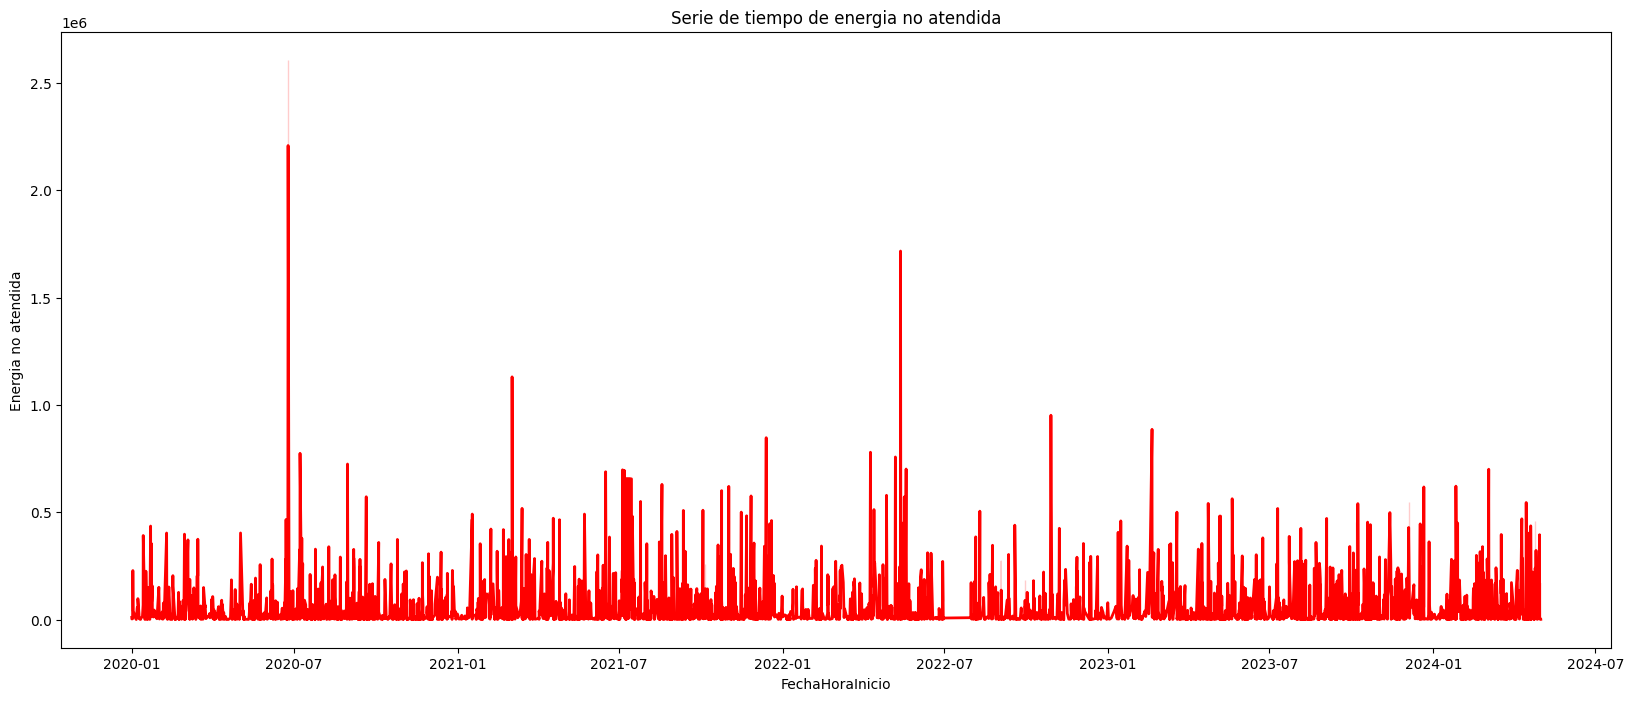

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.lineplot(data=data, x=data['FechaHoraInicio'],y=data['EnergiaNoAtendida'],color='red',lw=2,)
plt.ylabel("Energia no atendida")
plt.title("Serie de tiempo de energia no atendida");

<ipython-input-43-b9d962393e74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")


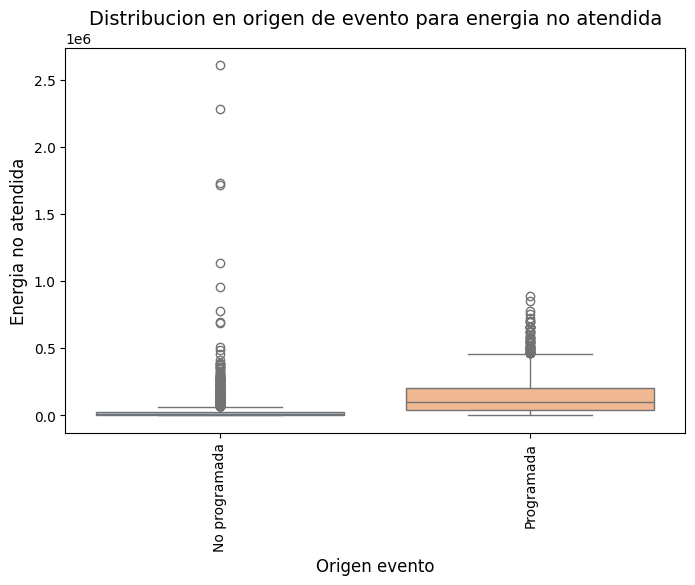

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['OrigenEvento'], y=data['EnergiaNoAtendida'], palette="pastel")
plt.title('Distribucion en origen de evento para energia no atendida', fontsize=14)
plt.xlabel('Origen evento', fontsize=12)
plt.ylabel('Energia no atendida', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

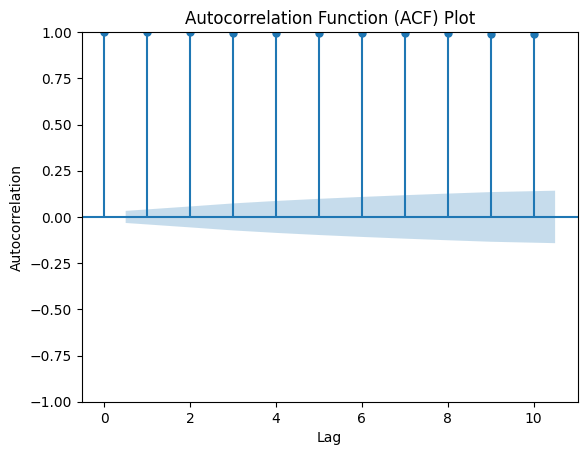

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

plt.figure(figsize=(12, 6))
plot_acf(data['FechaHoraInicio'], lags=10) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()